In [1]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 카이 제곱 분포
* 카이 제곱(chi-squared) 분포 : 가우시안 정규 분포를 따르는 확률 변수 $X$의 $N$개 샘플 $x_1, \dots, x_N$을 제곱하여 더하여 양수값만을 가지는 분포
* $Χ^2(x;ν)$로 표기
* student-t 분포처럼 자유도(degree of freedom) 모수를 가진다.
$$ x_i ∼ N(x) $$
$$ ↓ $$
$$ \sum_{i=1}^Nx_i^2 ∼ Χ^2(x;ν = N) $$

#### 확률밀도함수
$$ Χ^2(x;ν) = \frac{x^{\frac{ν}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{ν}{2}}Γ(\frac{ν}{2})} $$

#### 확률밀도함수 모양 살펴보기

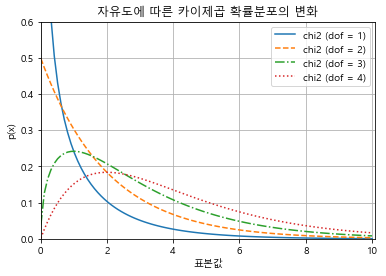

In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]

for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("chi2 (dof = %d)" % df))
    
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱 확률분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.grid()
plt.legend()
plt.show()

#### 카이제곱분포의 특이한 점
* 제곱합을 하는 샘플의 수가 2보다 커지면 0 근처의 값이 가장 많이 발생할 것이라는 직관과 달리 0보다 큰 어떤 수가 더 흔하게 발생한다.

#### 시뮬레이션으로 실제 제곱합의 분포 살펴포기
* 왼쪽 : 정규분포의 샘플을 단순히 제곱한 값의 분포
* 오른쪽 : 정규분포의 샘플 4개를 제곱하여 합한 값의 분포

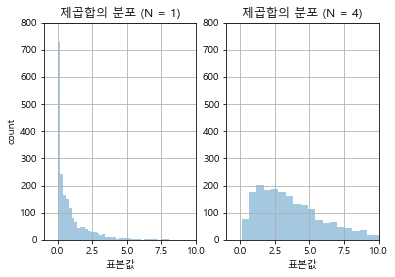

In [15]:
import seaborn as sns

np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("count")
plt.grid()

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")
plt.grid()

plt.show()

오른쪽 분포가 0이 아닌 1 근처의 값이 가장 많이 나오는 것을 볼 수 있다.

## 연습 문제
$N$이 다음과 같을 때 정규 분포에서 나온 표본의 제곱합이 이루는 분포를 시뮬에이션으로 구하고 히스토그램으로 나타내라.
1. $N = 2$일 때

2. $N = 30$일 때